Traitements à faire dans ce Notebook
---
- Nombre moyen de points par saison puit retirer la colonne point
- Vitesse de pointe moyenne par saison 
- Nombre de courses terminee par saison
- le circuit ayant le Nombre max de victoire 
- compter le nombre de fois premier
- compter le nombre de fois dans le top 10

In [34]:
import pandas as pd
import numpy as np

In [35]:
import sys
sys.path.append('../../')

from src.plot_utils import plot_correlation_matrix

## 1. Chargement du Dataset

In [36]:
df = pd.read_csv('../../data/outputs/05_merged_data.csv')

In [37]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,round,circuitId,circuit_name,constructor_name,country,constructor_is_active,nationality,driver_is_active,full_name,season_age
0,1,18,1,1,1,1,10.0,58,5690616,39,...,1,1,Australian Grand Prix,McLaren,British,1,British,1,Lewis Hamilton,23
1,2,18,2,2,5,2,8.0,58,5696094,41,...,1,1,Australian Grand Prix,BMW Sauber,German,0,German,0,Nick Heidfeld,31
2,3,18,3,3,7,3,6.0,58,5698779,41,...,1,1,Australian Grand Prix,Williams,British,1,German,0,Nico Rosberg,23
3,4,18,4,4,11,4,5.0,58,5707797,58,...,1,1,Australian Grand Prix,Renault,French,0,Spanish,1,Fernando Alonso,27
4,5,18,5,1,3,5,4.0,58,5708630,43,...,1,1,Australian Grand Prix,McLaren,British,1,Finnish,0,Heikki Kovalainen,27


## 2. Champs calculés sur les pilotes

### 2.1. Nombre total de points par pilote

In [38]:
# Récupérons les ids des pilotes
ids = df.driverId.to_list()
# Cféons la colonne des points moyen par pilote
df['driver_avg_point'] = np.float64(0)

In [39]:
for driverId in ids:
    avg_points = df[df.driverId == driverId]['points'].mean()
    df.loc[df.driverId == driverId, 'driver_avg_point'] = np.float64(avg_points)

In [40]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,circuitId,circuit_name,constructor_name,country,constructor_is_active,nationality,driver_is_active,full_name,season_age,driver_avg_point
0,1,18,1,1,1,1,10.0,58,5690616,39,...,1,Australian Grand Prix,McLaren,British,1,British,1,Lewis Hamilton,23,14.100932
1,2,18,2,2,5,2,8.0,58,5696094,41,...,1,Australian Grand Prix,BMW Sauber,German,0,German,0,Nick Heidfeld,31,1.407609
2,3,18,3,3,7,3,6.0,58,5698779,41,...,1,Australian Grand Prix,Williams,British,1,German,0,Nico Rosberg,23,7.740291
3,4,18,4,4,11,4,5.0,58,5707797,58,...,1,Australian Grand Prix,Renault,French,0,Spanish,1,Fernando Alonso,27,5.954054
4,5,18,5,1,3,5,4.0,58,5708630,43,...,1,Australian Grand Prix,McLaren,British,1,Finnish,0,Heikki Kovalainen,27,0.937500


### 2.2. Vitesse moyenne par pilote

In [41]:
# Initialisation de la colonne avec la valeure à 0 par défaut
df['driver_avg_speed'] = np.float64(0)

for driverId in ids:
    avg_speed = df[(df.driverId == driverId) & (df.fastestLapSpeed > 0)]['fastestLapSpeed'].mean()
    df.loc[df.driverId == driverId, 'driver_avg_speed'] = np.float64(avg_speed)

In [42]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,circuit_name,constructor_name,country,constructor_is_active,nationality,driver_is_active,full_name,season_age,driver_avg_point,driver_avg_speed
0,1,18,1,1,1,1,10.0,58,5690616,39,...,Australian Grand Prix,McLaren,British,1,British,1,Lewis Hamilton,23,14.100932,205.711759
1,2,18,2,2,5,2,8.0,58,5696094,41,...,Australian Grand Prix,BMW Sauber,German,0,German,0,Nick Heidfeld,31,1.407609,204.044578
2,3,18,3,3,7,3,6.0,58,5698779,41,...,Australian Grand Prix,Williams,British,1,German,0,Nico Rosberg,23,7.740291,200.290369
3,4,18,4,4,11,4,5.0,58,5707797,58,...,Australian Grand Prix,Renault,French,0,Spanish,1,Fernando Alonso,27,5.954054,204.462531
4,5,18,5,1,3,5,4.0,58,5708630,43,...,Australian Grand Prix,McLaren,British,1,Finnish,0,Heikki Kovalainen,27,0.937500,198.246165


### 2.3. Nombre de courses terminées par saison dépuis 2015

In [43]:
years_list = [0, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
df['race_end_bf_2015'] = 0
df['race_end_in_2015'] = 0
df['race_end_in_2016'] = 0
df['race_end_in_2017'] = 0
df['race_end_in_2018'] = 0
df['race_end_in_2019'] = 0
df['race_end_in_2020'] = 0
df['race_end_in_2021'] = 0
df['race_end_in_2022'] = 0
df['race_end_in_2023'] = 0

for driverId in ids:
    for year in years_list:
        if 0 == year:
            nber_of_win = df[(df.driverId == driverId) & (df.statusId == 1) & (df.year < 2015)].raceId.count()
            df.loc[df.driverId == driverId, 'race_end_bf_2015'] = nber_of_win
        else:
            nber_of_win = df[(df.driverId == driverId) & (df.statusId == 1) & (df.year == year)].raceId.count()
            df.loc[df.driverId == driverId, f'race_end_in_{year}'] = nber_of_win

In [44]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_bf_2015,race_end_in_2015,race_end_in_2016,race_end_in_2017,race_end_in_2018,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023
0,1,18,1,1,1,1,10.0,58,5690616,39,...,117,18,19,19,20,21,16,21,19,12
1,2,18,2,2,5,2,8.0,58,5696094,41,...,66,0,0,0,0,0,0,0,0,0
2,3,18,3,3,7,3,6.0,58,5698779,41,...,108,17,20,0,0,0,0,0,0,0
3,4,18,4,4,11,4,5.0,58,5707797,58,...,183,3,8,3,5,0,0,11,12,12
4,5,18,5,1,3,5,4.0,58,5708630,43,...,39,0,0,0,0,0,0,0,0,0


### 2.4. Le circuit où le pilote a le plus de victoires

In [45]:
df['driver_most_won_circuit_id'] = 0

for driverId in ids:
    try:
        df.loc[df.driverId == driverId, 'driver_most_won_circuit_id'] = df[
            (df.driverId == driverId) & (df.positionOrder == 1)
                ].groupby(['circuitId', 'name'])[['resultId']].count().sort_values(
                    ascending=False, by='resultId').resultId.idxmax()[0]
    except:
        df.loc[df.driverId == driverId, 'driver_most_won_circuit_id'] = 0

In [46]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_in_2015,race_end_in_2016,race_end_in_2017,race_end_in_2018,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id
0,1,18,1,1,1,1,10.0,58,5690616,39,...,18,19,19,20,21,16,21,19,12,0
1,2,18,2,2,5,2,8.0,58,5696094,41,...,0,0,0,0,0,0,0,0,0,0
2,3,18,3,3,7,3,6.0,58,5698779,41,...,17,20,0,0,0,0,0,0,0,0
3,4,18,4,4,11,4,5.0,58,5707797,58,...,3,8,3,5,0,0,11,12,12,0
4,5,18,5,1,3,5,4.0,58,5708630,43,...,0,0,0,0,0,0,0,0,0,0


### 2.5. Nombre de courses gagnées par le pilote

In [47]:
df['driver_nber_of_races_won'] = 0

for driverId in ids:
    df.loc[df.driverId == driverId, 'driver_nber_of_races_won'] = df[(df.driverId == driverId) & (df.race_rank == 1)].shape[0]

In [48]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_in_2016,race_end_in_2017,race_end_in_2018,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won
0,1,18,1,1,1,1,10.0,58,5690616,39,...,19,19,20,21,16,21,19,12,0,103
1,2,18,2,2,5,2,8.0,58,5696094,41,...,0,0,0,0,0,0,0,0,0,0
2,3,18,3,3,7,3,6.0,58,5698779,41,...,20,0,0,0,0,0,0,0,0,23
3,4,18,4,4,11,4,5.0,58,5707797,58,...,8,3,5,0,0,11,12,12,0,32
4,5,18,5,1,3,5,4.0,58,5708630,43,...,0,0,0,0,0,0,0,0,0,1


### 2.6. Nombre de fois dans le top 10 (la zone des points)

In [49]:
df['driver_nber_of_times_in_top_10'] = 0

for driverId in ids:
    df.loc[df.driverId == driverId, 'driver_nber_of_times_in_top_10'] = df[(df.driverId == driverId) & (df.race_rank <= 10)].shape[0]

In [50]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_in_2017,race_end_in_2018,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10
0,1,18,1,1,1,1,10.0,58,5690616,39,...,19,20,21,16,21,19,12,0,103,283
1,2,18,2,2,5,2,8.0,58,5696094,41,...,0,0,0,0,0,0,0,0,0,101
2,3,18,3,3,7,3,6.0,58,5698779,41,...,0,0,0,0,0,0,0,0,23,144
3,4,18,4,4,11,4,5.0,58,5707797,58,...,3,5,0,0,11,12,12,0,32,250
4,5,18,5,1,3,5,4.0,58,5708630,43,...,0,0,0,0,0,0,0,0,1,36


## 3. Champs calculés constructeurs

### 3.1. Nombre de courses gagnées par constructeurs

In [51]:
# Récupérons l'id de chaque constructeurs
ids = df.constructorId.to_list()

In [52]:
df['constructor_races_won'] = 0

for constId in ids:
    df.loc[df.constructorId == constId, 'constructor_races_won'] = df[(df.constructorId == constId) & (df.race_rank == 1)].shape[0]

In [53]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_in_2018,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,constructor_races_won
0,1,18,1,1,1,1,10.0,58,5690616,39,...,20,21,16,21,19,12,0,103,283,179
1,2,18,2,2,5,2,8.0,58,5696094,41,...,0,0,0,0,0,0,0,0,101,1
2,3,18,3,3,7,3,6.0,58,5698779,41,...,0,0,0,0,0,0,0,23,144,114
3,4,18,4,4,11,4,5.0,58,5707797,58,...,5,0,0,11,12,12,0,32,250,35
4,5,18,5,1,3,5,4.0,58,5708630,43,...,0,0,0,0,0,0,0,1,36,179


### 3.2. Moyenne de points par constructeur

In [54]:
df['constructor_avg_point'] = np.float64(0)

for constId in ids:
    avg_points = df[df.constructorId == constId]['points'].mean()
    df.loc[df.constructorId == constId, 'constructor_avg_point'] = np.float64(avg_points)

In [55]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_in_2019,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,constructor_races_won,constructor_avg_point
0,1,18,1,1,1,1,10.0,58,5690616,39,...,21,16,21,19,12,0,103,283,179,3.364151
1,2,18,2,2,5,2,8.0,58,5696094,41,...,0,0,0,0,0,0,0,101,1,2.200000
2,3,18,3,3,7,3,6.0,58,5698779,41,...,0,0,0,0,0,0,23,144,114,2.243008
3,4,18,4,4,11,4,5.0,58,5707797,58,...,0,0,11,12,12,0,32,250,35,2.257942
4,5,18,5,1,3,5,4.0,58,5708630,43,...,0,0,0,0,0,0,1,36,179,3.364151


### 3.1. Nombre de fois dans la zone des points

In [56]:
df['constructor_times_in_top_10'] = 0

for constId in ids:
    df.loc[df.constructorId == constId, 'constructor_times_in_top_10'] = df[(df.constructorId == constId) & (df.race_rank <= 10)].shape[0]

In [57]:
df.head()

,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,race_end_in_2020,race_end_in_2021,race_end_in_2022,race_end_in_2023,driver_most_won_circuit_id,driver_nber_of_races_won,driver_nber_of_times_in_top_10,constructor_races_won,constructor_avg_point,constructor_times_in_top_10
0,1,18,1,1,1,1,10.0,58,5690616,39,...,16,21,19,12,0,103,283,179,3.364151,1110
1,2,18,2,2,5,2,8.0,58,5696094,41,...,0,0,0,0,0,0,101,1,2.200000,91
2,3,18,3,3,7,3,6.0,58,5698779,41,...,0,0,0,0,0,23,144,114,2.243008,764
3,4,18,4,4,11,4,5.0,58,5707797,58,...,0,11,12,12,0,32,250,35,2.257942,390
4,5,18,5,1,3,5,4.0,58,5708630,43,...,0,0,0,0,0,1,36,179,3.364151,1110


## 4. Analyse des corrélations
L'objectifs ici étant de garder les caractéristiques étant fortement corrélées avec la variable à prédire (race_rank)

In [58]:
not_corr_cols = ['constructorId', 'driverId', 'raceId', 'resultId', 'year', 'round', 'circuitId', 'season_age', 'driver_most_won_circuit_id']

# Retirer comme à la base les variable de base n'étant pas fortement corrélées
df = df.drop(not_corr_cols, axis=1)

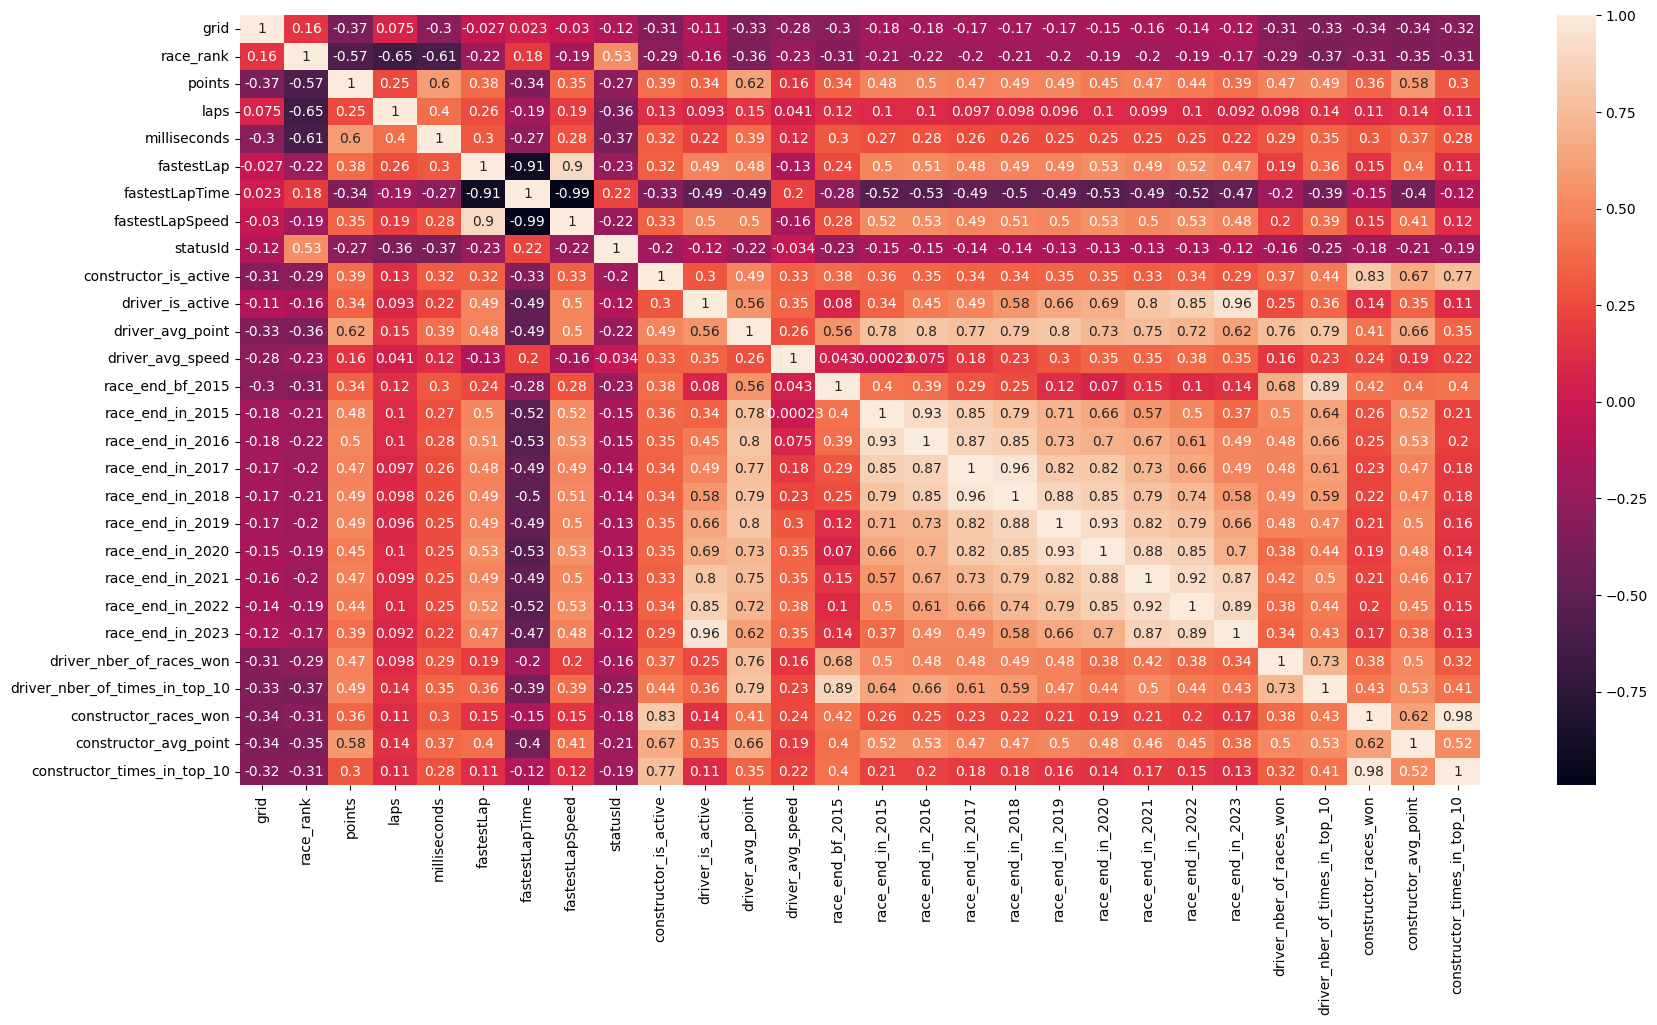

In [59]:
plot_correlation_matrix(df)

## 5. Extraction du jeu de données

In [60]:
df.to_csv('../../data/outputs/06_final_dataset.csv', index=False)